<a href="https://colab.research.google.com/github/VieiraTiago/Pos-Graduacao/blob/main/MVP_Sprint%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MVP de Análise de Dados e Boas Práticas**

Aluno: Tiago Santos Vieira

Profs. Tatiana Escovedo e Hugo Villamizar


### **1 - Informações sobre dataset**

A base de dados analisada consolida as informações sobre número de casos de COVID nos Estados Unidos.

https://datasetsearch.research.google.com/search?query=coronavirus%20covid-19&docid=L2cvMTFqbl8wZmZsaw%3D%3D

### **2 - Objetivo do tratamento dos dados**

O objetivo do tratamento dos dados é analisar o número de casos de COVID por país no Estados Unidos em 2023.

Os dados mapeados são definidos como:

**date**: Data da ocorrência

**county**: Condado

**state**: Estado

**fips**: Númdero de identificação dos estados e de algumas áreas associadas.

**cases**: Número de casos de COVID

**deaths**: Número de mortes por COVID


### **3 - Análise da base de dados**

Nos códigos seguintes serão importados os pacotes que possibilitem as análises desejadas e serão rodados os códigos para identificar a necessidade de ajustes no dataset.

In [1]:
# Atividade anterior à importação do dataset, importação das bibliotecas e análise.

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 22.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=03da9897f2b08de06f97c253b2a46d649ebe146ac5330c08bcf6ca9022116e4e
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [2]:
 # Configuração para não exibir os warnings
 
 import warnings
 warnings.filterwarnings("ignore")

 # Importação de pacotes
 
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import matplotlib as mpl
 import seaborn as sns
 import seaborn as sbrn
 from matplotlib import cm
 import io
 from pandas import set_option
 import csv
 from pandas.plotting import scatter_matrix

 # Para tratamento de missings
 import missingno as ms  

 ## Transformações numéricas
 from sklearn.preprocessing import StandardScaler
 from sklearn.preprocessing import MinMaxScaler

 ## Transformações Categóricas
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
!pip install category_encoders
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.0 MB/s eta 0:00:00


In [3]:
from IPython.display import display

In [4]:
# Importando arquivo do google colab (/content/us-counties-2023.csv)
# Caso não rode, será necessário baixar o arquivo para máquina e fazer o upload, por meio da função usada.
from google.colab import files
uploaded = files.upload()

Saving us-counties-2023.csv to us-counties-2023.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['us-counties-2023.csv']))

In [6]:
# Importaçao de pacote para ignorar os warnings.

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Mostrar o tamanho do dataset

df.shape

(267009, 6)

In [8]:
parse_dates=['Date']

In [9]:
# Exibir informações sobre como estão classificados o tipos de dados nas colunas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267009 entries, 0 to 267008
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    267009 non-null  object 
 1   county  267009 non-null  object 
 2   state   267009 non-null  object 
 3   fips    264023 non-null  float64
 4   cases   267009 non-null  int64  
 5   deaths  260613 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ MB


Ao avaliar os tipos de dados, identifica-se que a data está como objeto, sendo necessário ajustar este item para que possamos fazer as análise por período temporal.

In [10]:
import locale

In [11]:
import datetime as dt

In [12]:
from datetime import date

In [13]:
data_atual = date.today()
print(data_atual)

2023-05-03


In [14]:
# Alterar o formato da data para datetime, em vez de object.

df['date'] = pd.to_datetime(df['date'])

In [15]:
df['fips'] = df['fips'].apply(lambda _: str(_))

In [16]:
# Exibir informações sobre como estão classificados o tipos de dados nas colunas, após alteração do tipo data..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267009 entries, 0 to 267008
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    267009 non-null  datetime64[ns]
 1   county  267009 non-null  object        
 2   state   267009 non-null  object        
 3   fips    267009 non-null  object        
 4   cases   267009 non-null  int64         
 5   deaths  260613 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 12.2+ MB


In [17]:
# Mostrando a menor data do dataset

df["date"].min()

Timestamp('2023-01-01 00:00:00')

In [18]:
# Mostrando a maior data do dataset

df["date"].max()

Timestamp('2023-03-23 00:00:00')

In [19]:
df["cases"].min()

0

In [20]:
df["cases"].max()

3723182

In [21]:
df["deaths"].min()

0.0

In [22]:
df["deaths"].max()

45155.0

In [23]:
# Exibir as dez primeiras linhas do dataset.

df.head(10)

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0
5,2023-01-01,Bullock,Alabama,1011.0,2886,54.0
6,2023-01-01,Butler,Alabama,1013.0,6185,130.0
7,2023-01-01,Calhoun,Alabama,1015.0,39458,665.0
8,2023-01-01,Chambers,Alabama,1017.0,10311,174.0
9,2023-01-01,Cherokee,Alabama,1019.0,6456,133.0


In [24]:
# Exibir as dez últimas linhas do dataset.

df.tail(10)

,date,county,state,fips,cases,deaths
266999,2023-03-23,Niobrara,Wyoming,56027.0,863,12.0
267000,2023-03-23,Park,Wyoming,56029.0,7735,154.0
267001,2023-03-23,Platte,Wyoming,56031.0,2301,45.0
267002,2023-03-23,Sheridan,Wyoming,56033.0,10043,92.0
267003,2023-03-23,Sublette,Wyoming,56035.0,2324,28.0
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0
267008,2023-03-23,Weston,Wyoming,56045.0,1906,23.0


In [25]:
# Exibir o cabeçalho das colunas

print(df.columns.ravel())

['date' 'county' 'state' 'fips' 'cases' 'deaths']


In [26]:
# Geração de conjunto de estatística descritiva.

df.describe()

,cases,deaths
count,2.670090e+05,260613.000000
mean,3.146473e+04,352.209924
std,1.193119e+05,1322.158230
min,0.000000e+00,0.000000
25%,3.147000e+03,48.000000
50%,7.955000e+03,111.000000
75%,2.071100e+04,262.000000
max,3.723182e+06,45155.000000


In [27]:
df.groupby('deaths').size()

deaths
0.0        2976
1.0        1124
2.0        1132
3.0         820
4.0        1000
           ... 
45043.0       2
45074.0       1
45076.0       3
45123.0       1
45155.0       1
Length: 3062, dtype: int64

É possível identificar que as classes estão desbalanceadas.

In [28]:
# Apresentando correlação de Person entre colunas 

df.corr(method = 'pearson')

,cases,deaths
cases,1.000000,0.965726
deaths,0.965726,1.000000


Vemos que a correlação é próxima de um, mostrando que quando uma variável sobe a outra também sobe.

Text(0, 0.5, 'Número de mortes')

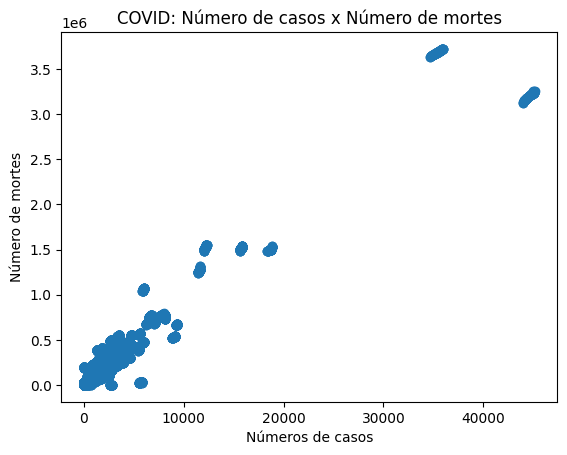

In [63]:
# Criar gráfico de dispersão

plt.scatter(df['deaths'],df['cases'])

plt.title('COVID: Número de casos x Número de mortes')
plt.xlabel('Números de casos')
plt.ylabel('Número de mortes')

A partir do gráfico de dispersão podemos ter uma ideia de quais os valores que temos à disposição. Por enquanto o eixo x está poluído, sendo impossível distinguir os valores abaixo de 10000. Além disso temos poucas valores acima de 30000.

Uma forma de melhorar a apresentação das informações é excluir os valores que se distanciam muito dos demais, os outliers, além, é claro, do ajuste dos rótulos do eixo x.

In [30]:
atributos = df.columns.drop(['deaths'])

In [31]:
x_data = range(0, df.shape[0])

In [32]:
print(df.columns.tolist())
type(df.columns.tolist())

['date', 'county', 'state', 'fips', 'cases', 'deaths']


list

## **4 - Visualização Unimodal**

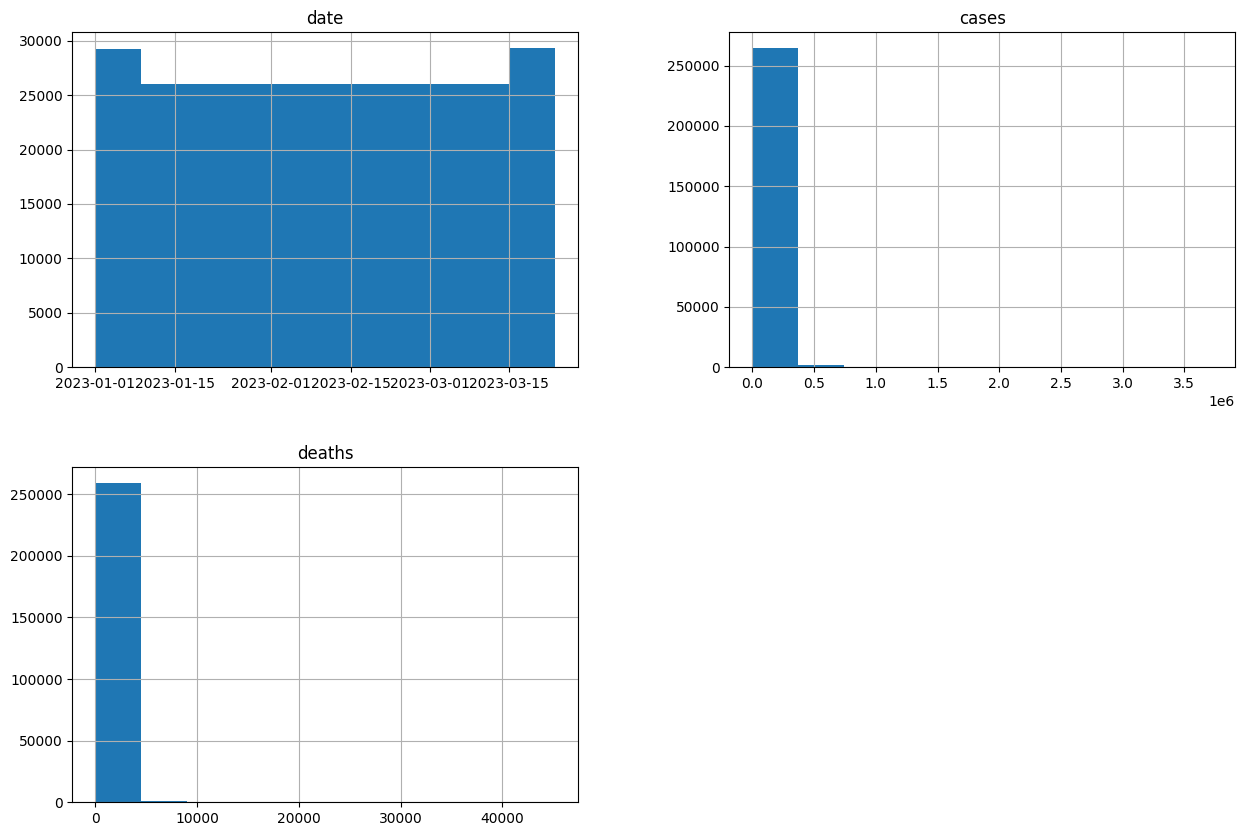

In [33]:
df.hist(figsize = (15,10))
plt.show()

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()



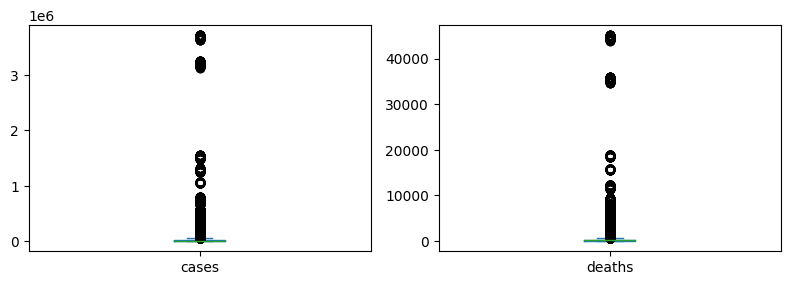

In [36]:
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()


# **5 - Visualização Multimodal**



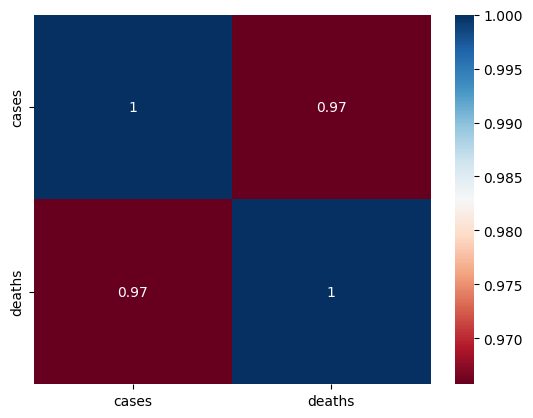

In [37]:
# Matriz de Correlação com Matplotlib Seaborn

sns.heatmap(df.corr(), annot=True, cmap='RdBu');

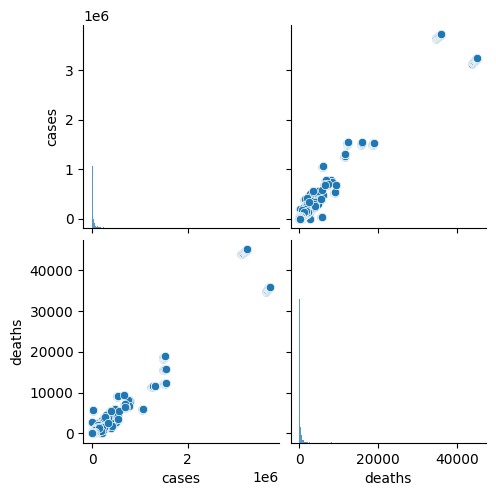

In [38]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df)

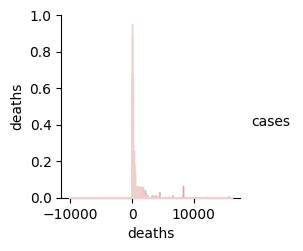

In [39]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(df, hue = "cases", height = 2.5);

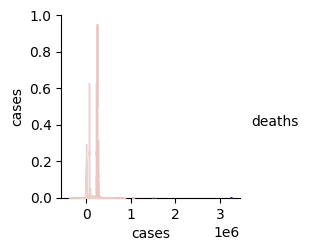

In [40]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(df, hue = "deaths", height = 2.5);

# **6 - Pré-processamento de dados**: 



## 6.1 Tratamento de Missings e Limpeza

In [41]:
# verificando nulls no dataset
df.isnull().sum()


date         0
county       0
state        0
fips         0
cases        0
deaths    6396
dtype: int64

Inicialmente parece que tem missing no 'deaths'. Como o valor 0 é um valor possível para 'deaths', não será necessário realizar o tratamento.

In [57]:
# Salvar um NOVO dataset para tratamento de missings 
# (cuidado para não sobrescrever o dataset original!)

# Recuperando os nomes das colunas
col = list(df.columns)


In [58]:
# O novo dataset conterá todas as colunas com exceção da última (classe)
atributos = df[col[:]]


In [59]:
# Substituir os zeros por NaN
atributos.replace(0, np.nan, inplace=True)


<Axes: >

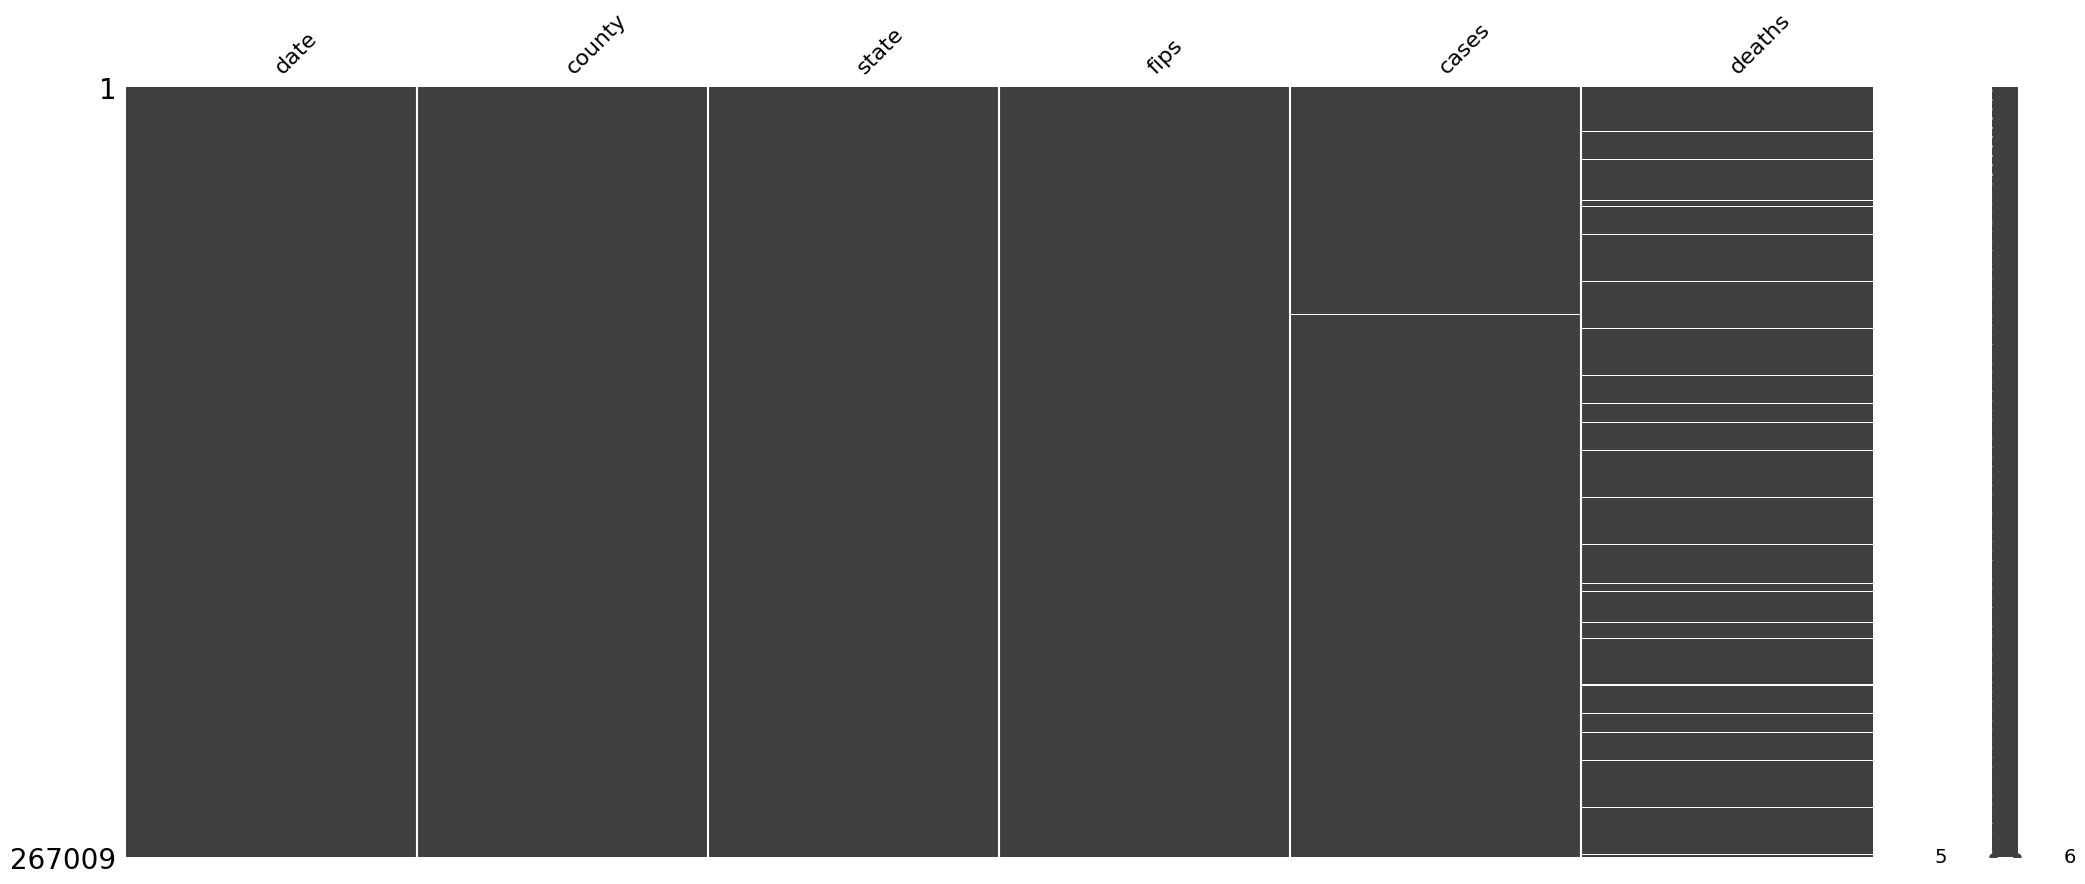

In [60]:
# Exibir a visualização matricial da nulidade do dataset
ms.matrix(atributos)


In [61]:
# Verificar as colunas do dataset que apresentam valores ausentes
df['deaths'].value_counts()

0.0        2976
12.0       2204
32.0       1917
51.0       1803
39.0       1772
           ... 
35189.0       1
2772.0        1
3758.0        1
35720.0       1
6409.0        1
Name: deaths, Length: 3062, dtype: int64

#  **7 - Extra**

In [43]:
# Valor mínimo de casos
df ['cases'] .min()

0

In [44]:
 # Valor máximo de casos
df ['cases'] .max()

3723182

In [45]:
 # Soma de casos
df ['cases'] .sum()

8401366932

In [46]:
# Média aritmética dos dados
df ['cases'] .mean()

31464.733143826612

In [47]:
# Mediana (valor do meio) dos dados.
df ['cases'] .median()

7955.0

In [49]:
df ['cases'] .std()

119311.9239552022

In [50]:
df ['cases'] .var()

14235335197.891954

In [51]:
df ['deaths'] .min()

0.0

In [52]:
df ['deaths'] .max()

45155.0

In [53]:
df ['deaths'] .sum()

91790485.0

In [54]:
df ['deaths'] .mean()

352.2099242938764

In [55]:
df ['deaths'] .median()


111.0